In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Load a model

"""

from dev.segmentation import model as lib_model

model = lib_model.model()
lib_model.draw_model(model, "model.pdf")

/home/mh19137/miniconda3/envs/fish/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-18 11:47:59,751	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-18 11:48:00,126	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [3]:
"""
Create an optimiser

"""

optimiser = lib_model.optimiser(model)
optimiser

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0026
    maximize: False
    weight_decay: 0
)

In [4]:
"""
Choose a loss function

"""

from monai.losses import TverskyLoss

loss = TverskyLoss(include_background=True, alpha=0.2)

In [5]:
device = "cuda"
model.to(device)

AttentionUnet(
  (model): Sequential(
    (0): ConvBlock(
      (conv): Sequential(
        (0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(7, 7, 7), stride=(1, 1, 1), padding=(3, 3, 3))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.015, inplace=False)
            (A): ReLU()
          )
        )
        (1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(7, 7, 7), stride=(1, 1, 1), padding=(3, 3, 3))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.015, inplace=False)
            (A): ReLU()
          )
        )
      )
    )
    (1): AttentionLayer(
      (attention): AttentionBlock(
        (W_g): Sequential(
          (0): Convolution(
            (conv): Conv3d(16, 8, kernel_size=(1, 1, 1), stride=(1, 1, 1))
          )
          (1): BatchNorm3d(8, eps=1

(<Figure size 1200x1200 with 16 Axes>,
 array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
         <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
        [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
         <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
        [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
         <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
        [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
         <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>]],
       dtype=object))

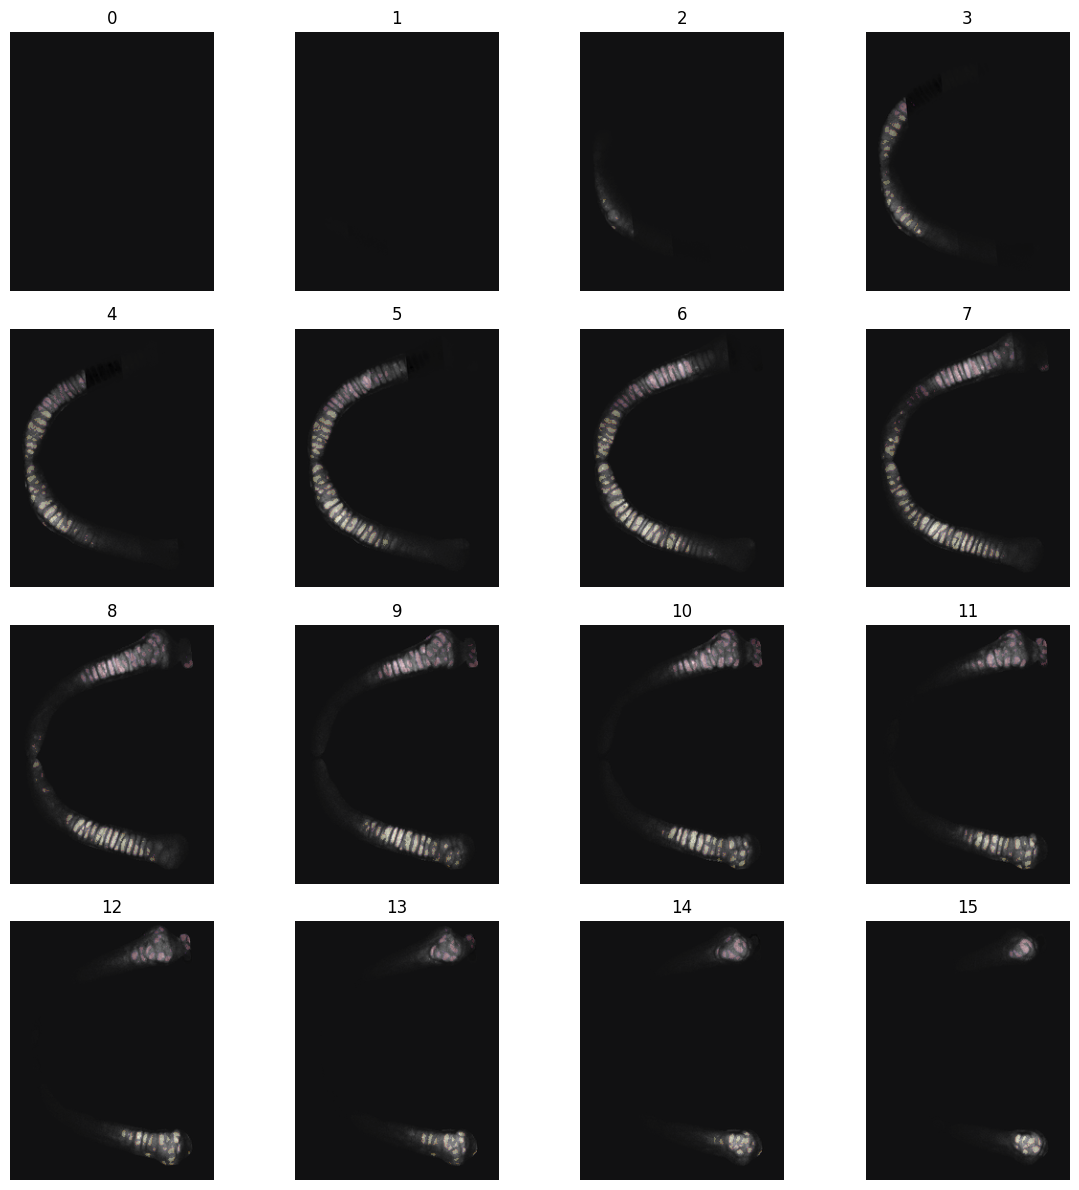

In [80]:
"""
Display two images I'm using for training

"""

import numpy as np
from dev import plot

folder = "/home/mh19137/zebrafish_rdsf/Yushi/Videos/theta_1/Code/segmenter/notebooks/projects/20180701_cell_segment/"
img_path = folder + "jaw_raw_image.npy"
mask_path = folder + "jaw_labels.npy"

img = np.load(img_path)
mask = np.load(mask_path)

# Convert the mask to labels
mask[(mask < 32) & (mask > 0)] = 1
mask[mask >= 32] = 2

img = np.transpose(img, (2, 0, 1))
mask = np.transpose(mask, (2, 0, 1))

plot.plot_arr(img, mask)

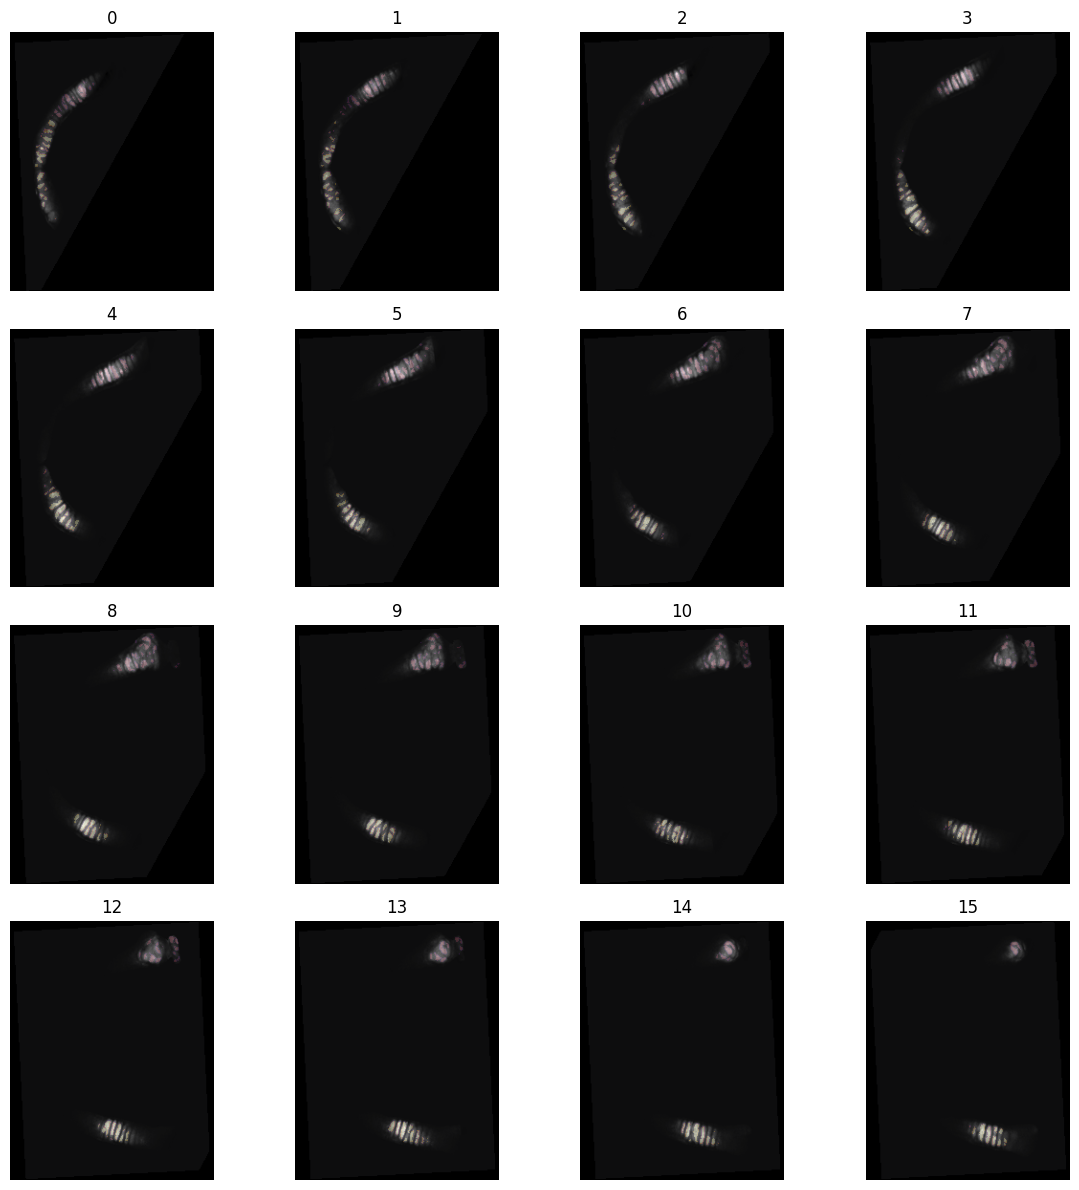

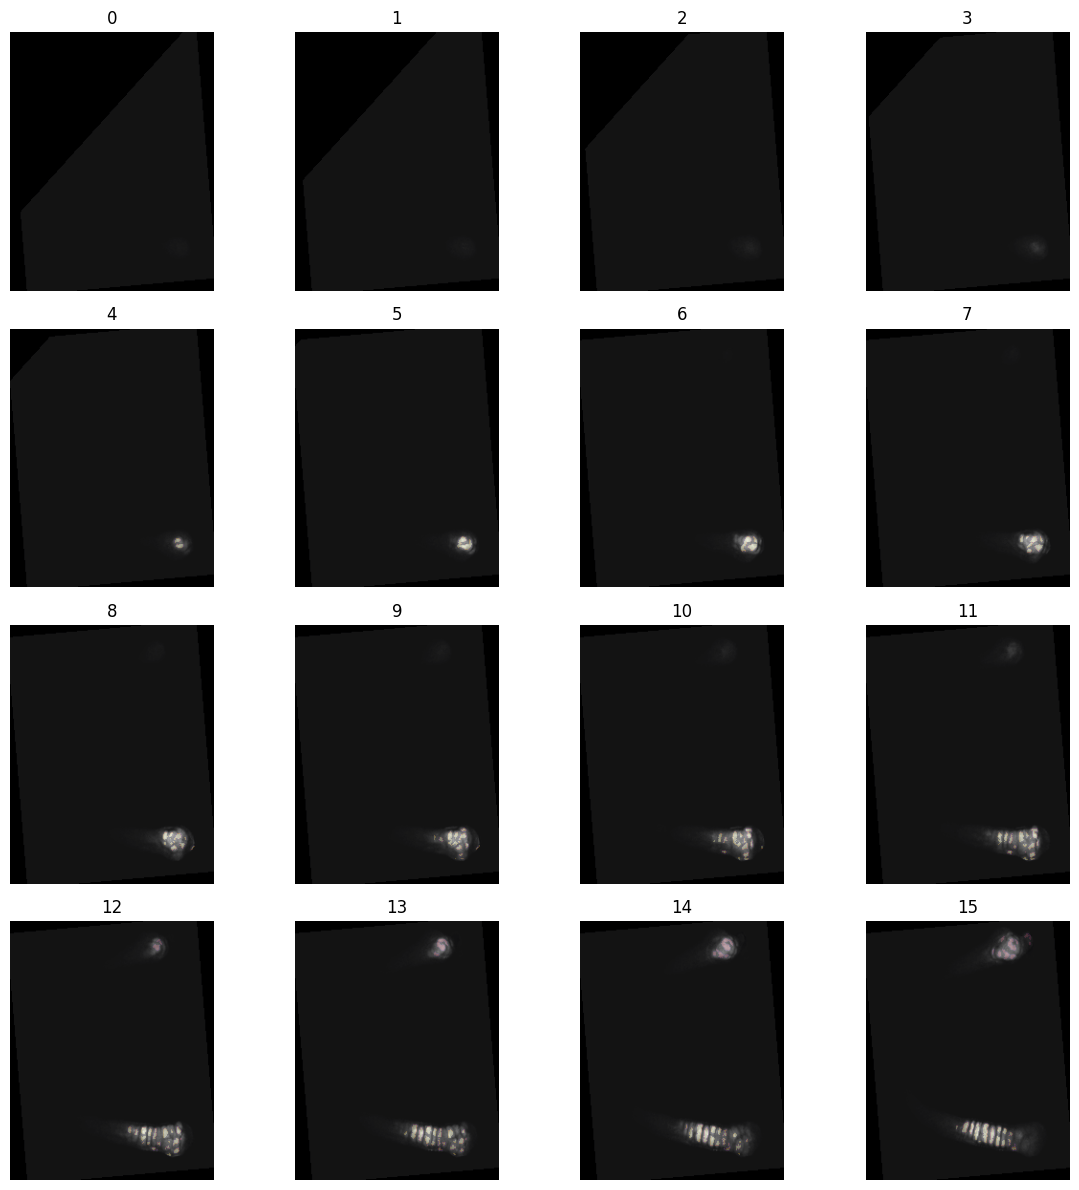

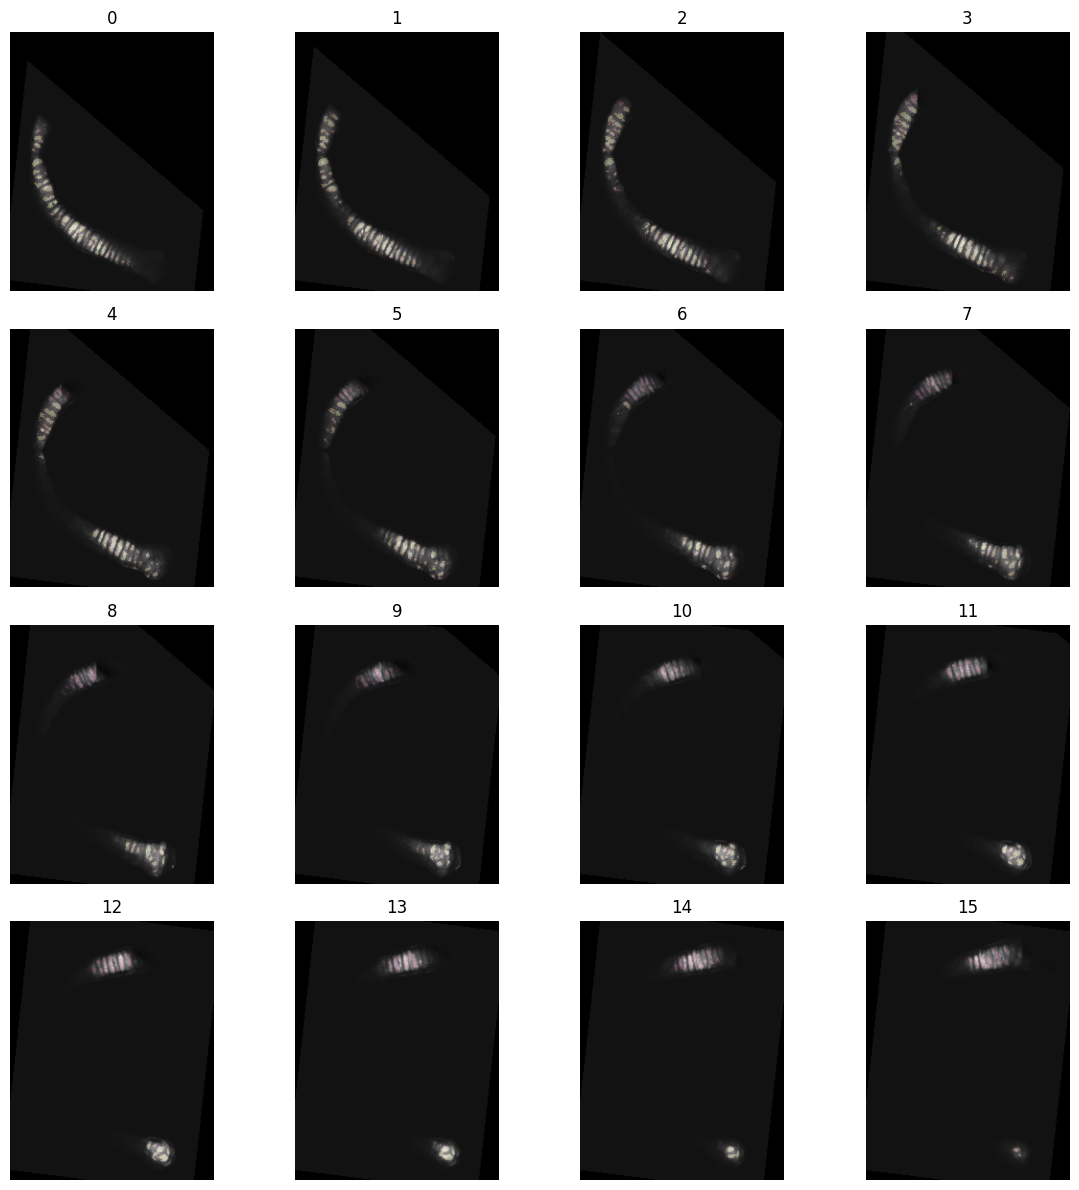

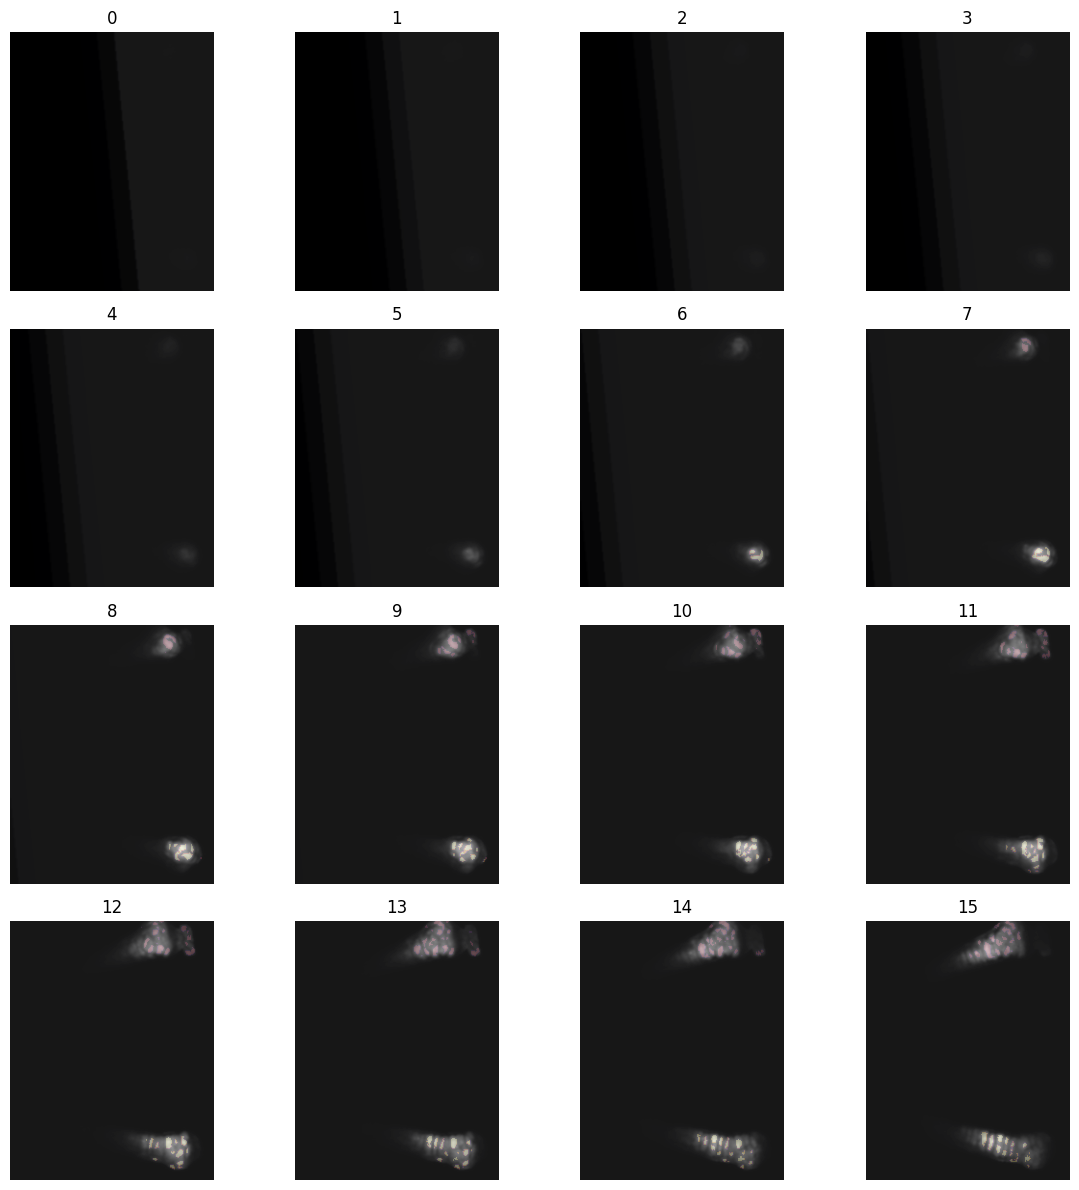

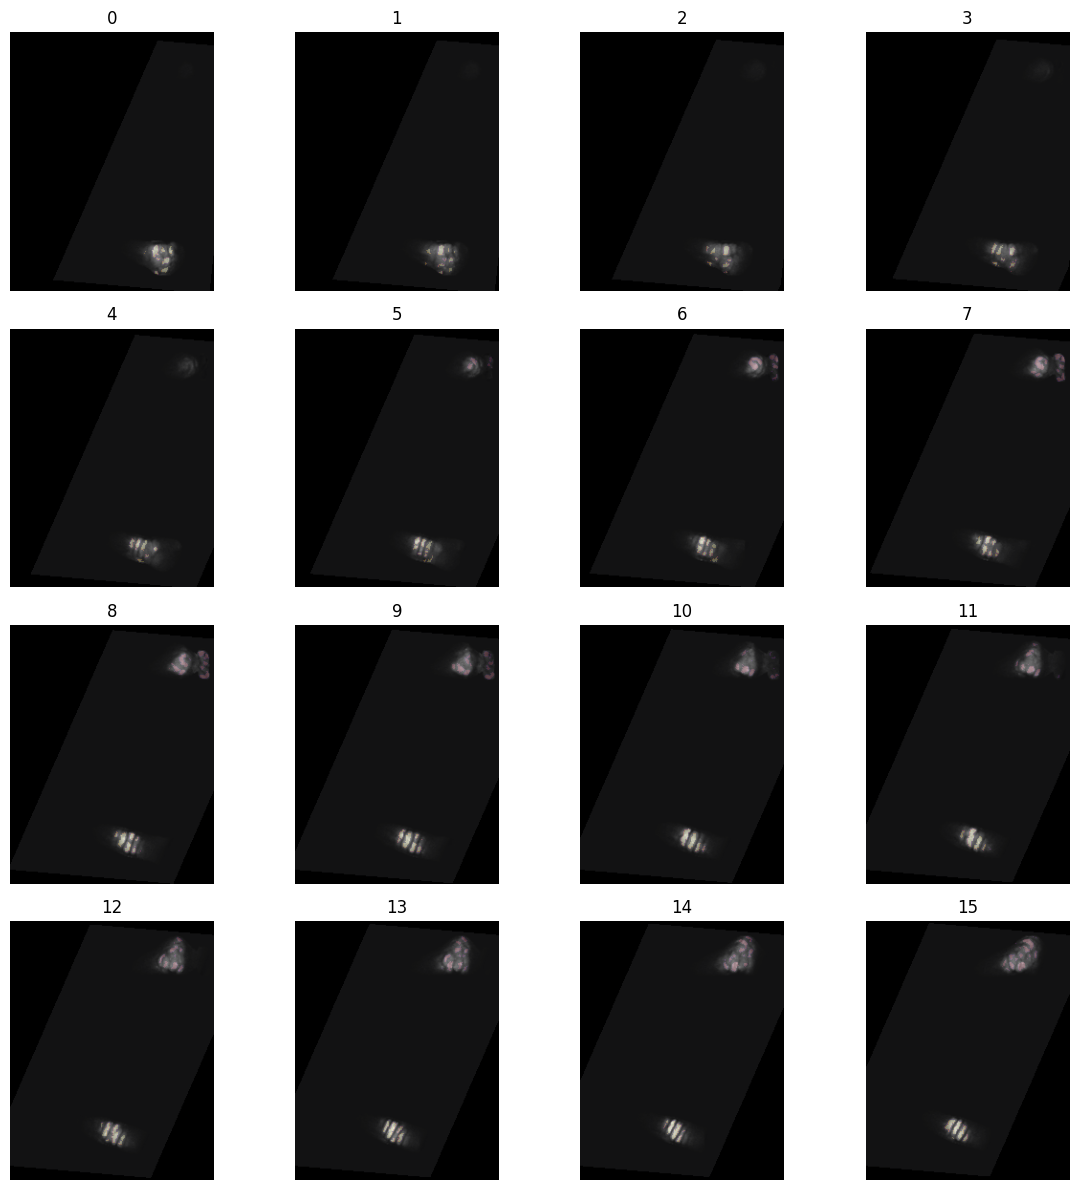

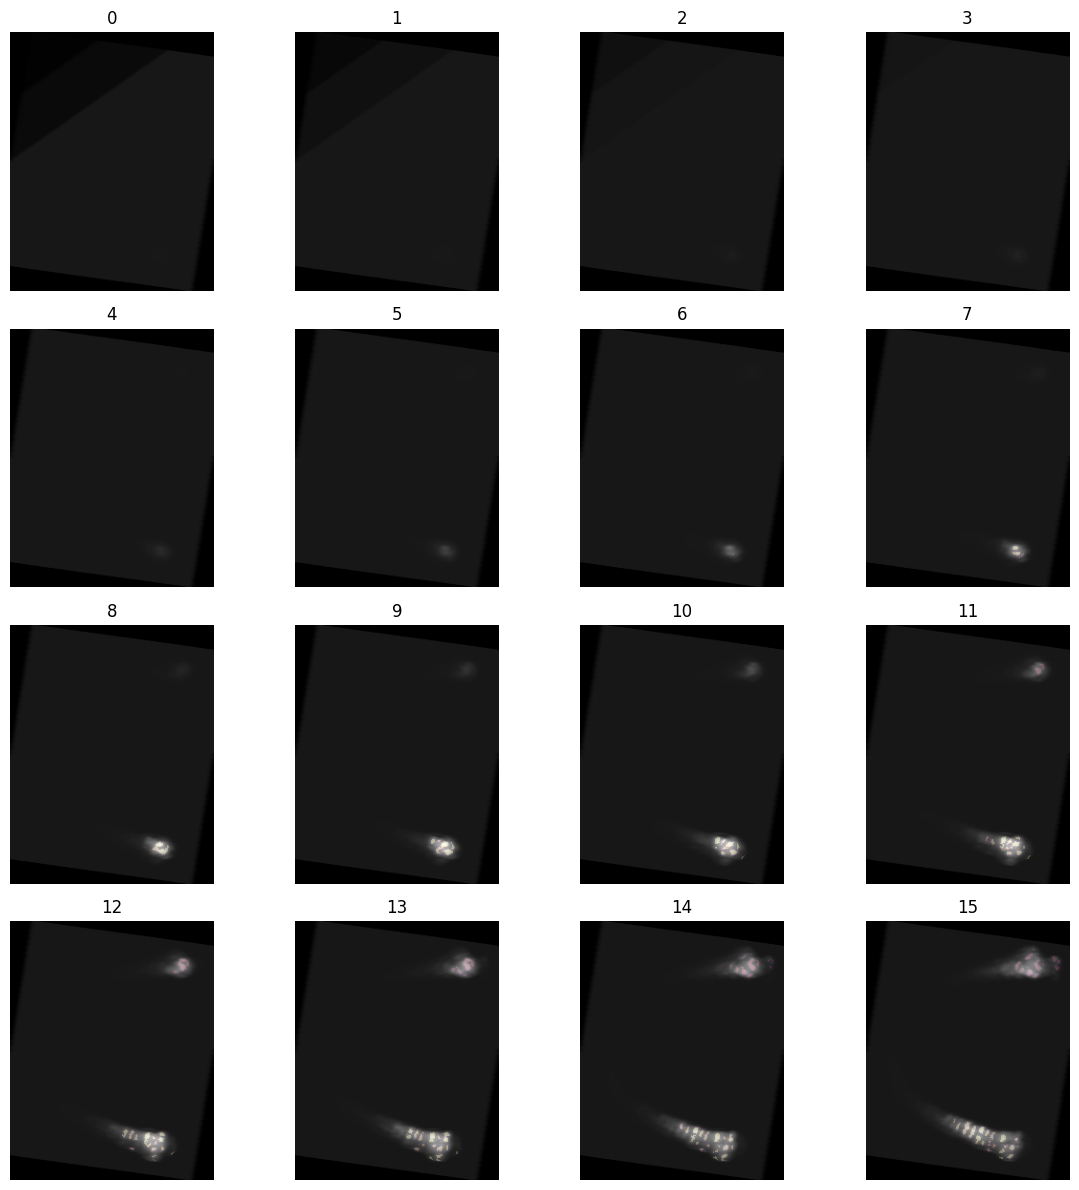

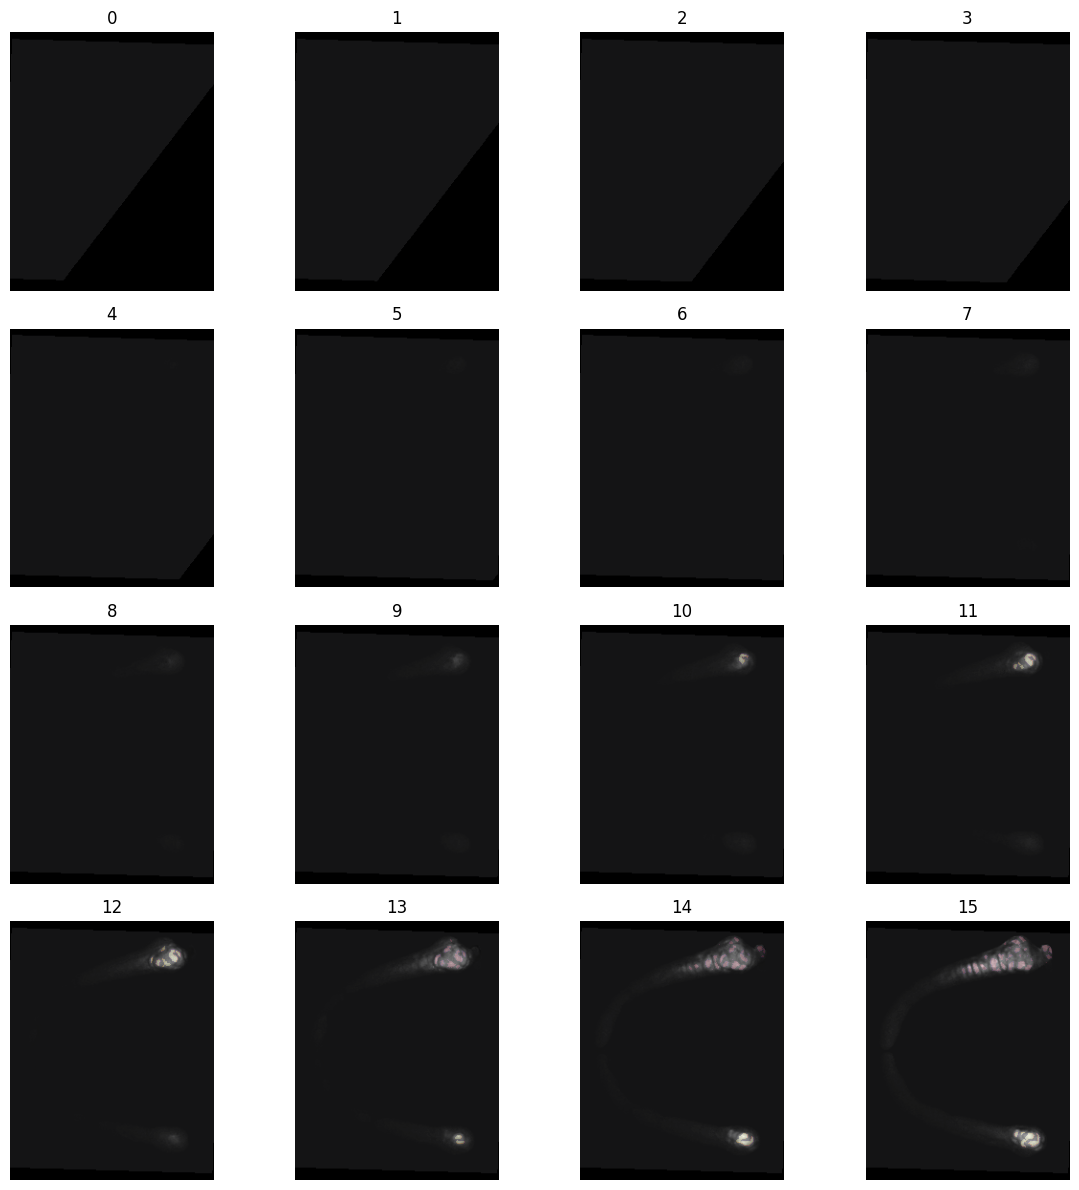

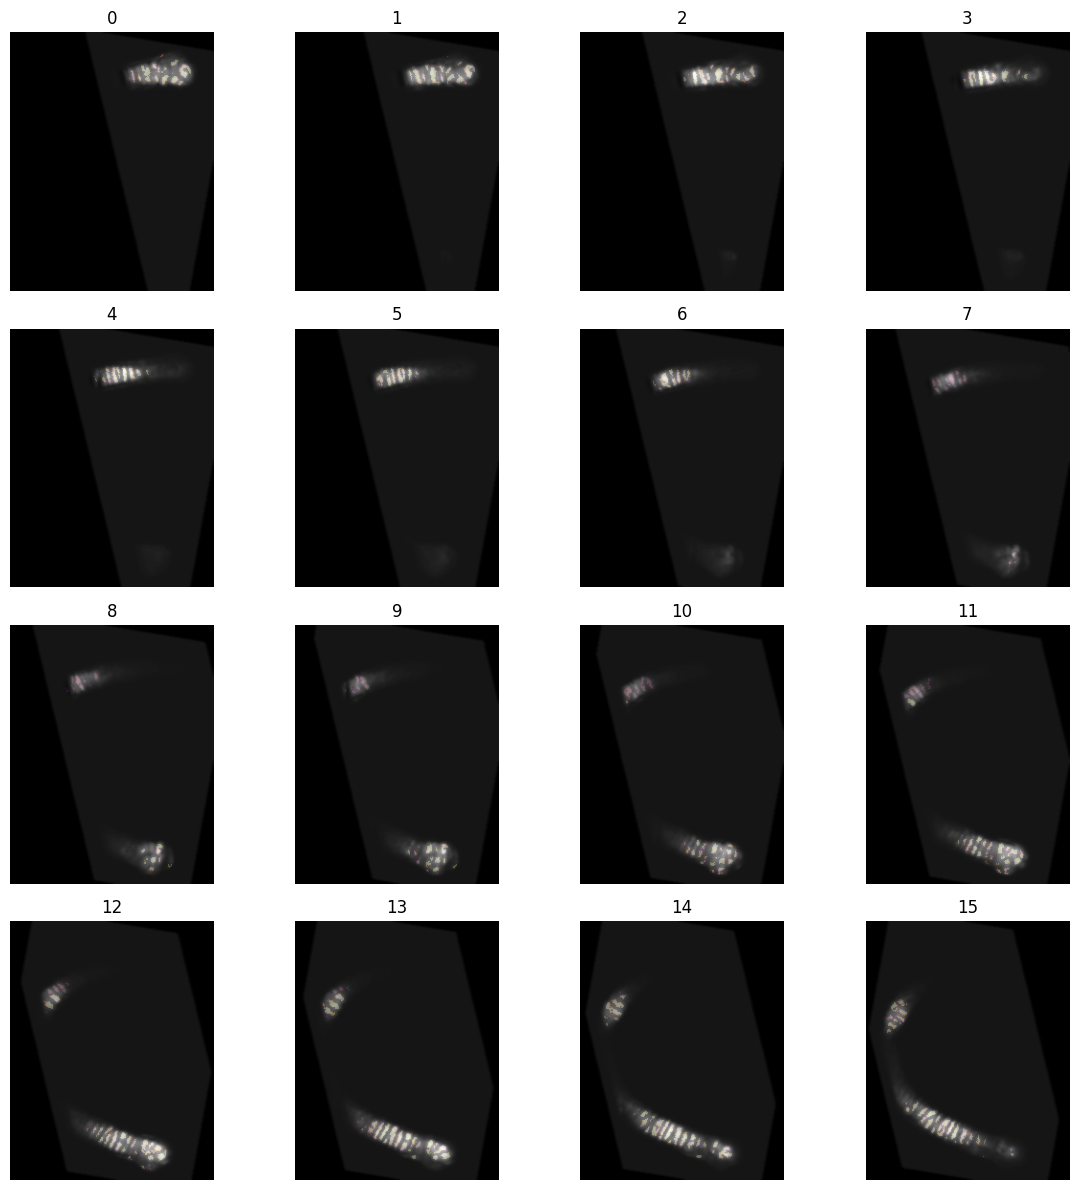

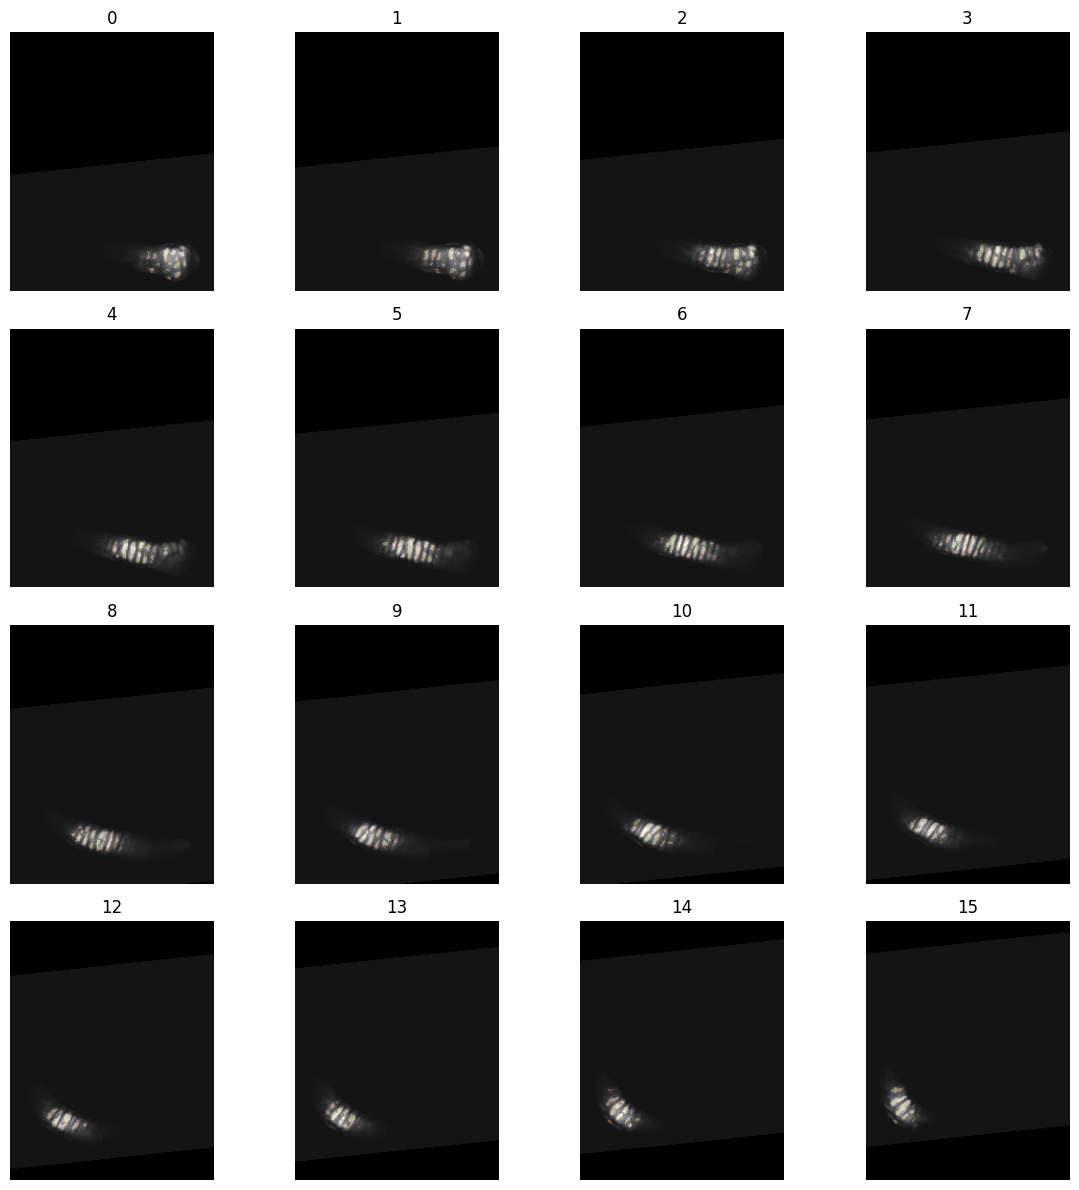

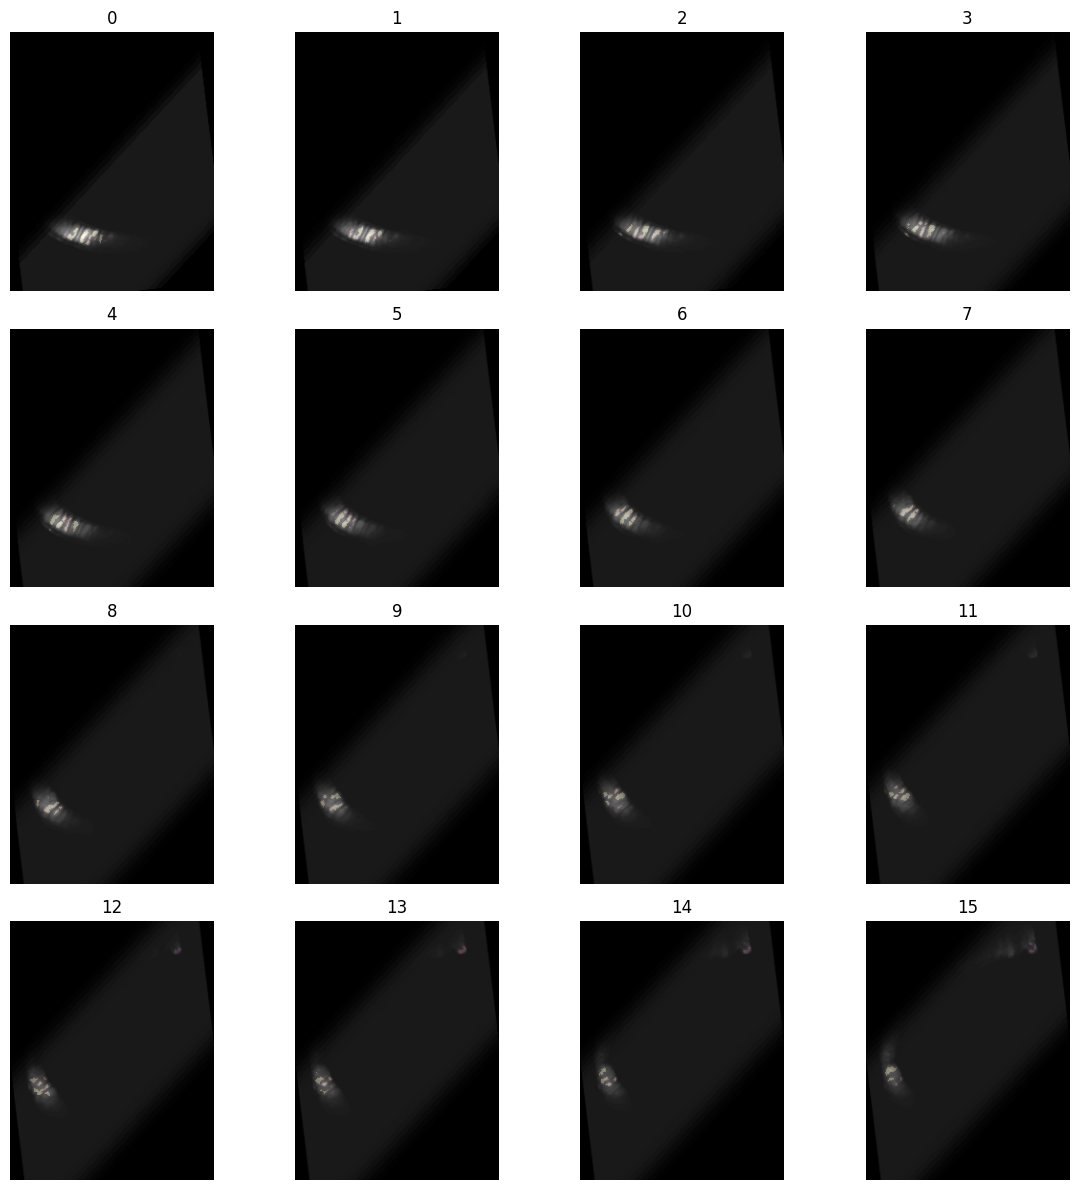

In [79]:
""" Convert images to tensors and apply transformations """

from dev import image_io

transform = image_io.random_transforms()
subjects = [image_io.subject(img, mask) for _ in range(10)]

subjectdataset = image_io.subject_dataset(subjects, transform)

for subject in subjectdataset:
    img_, mask_ = subject.image.data.squeeze(), subject.label.data.squeeze()

    img_ = image_io.pytorch2img(img_)
    mask_ = image_io.pytorch2img(mask_)

    plot.plot_arr(img_, mask_)